# Training

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
with open("kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [5]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [6]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


## READING DATASET

In [7]:
path = "kddcup.data.corrected"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [8]:
df.shape

(4898431, 43)

In [9]:
df['target'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: target, dtype: int64

In [10]:
df['Attack Type'].value_counts()

dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: Attack Type, dtype: int64

In [11]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

## DATA PREPROCESSING

In [12]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

## CATEGORICAL FEATURES DISTRIBUTION

In [14]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

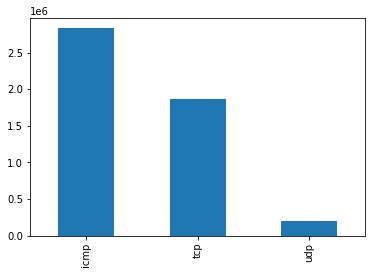

In [15]:
bar_graph('protocol_type')

### Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

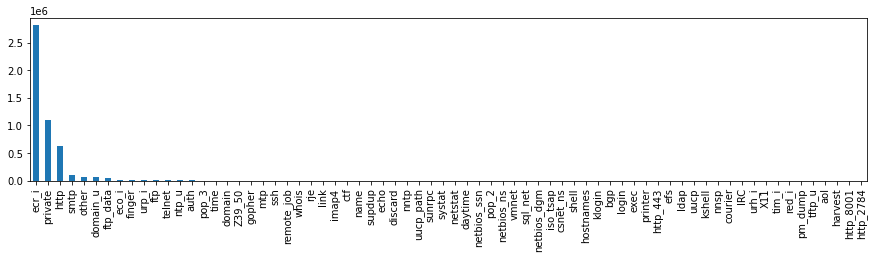

In [16]:
plt.figure(figsize=(15,3))
bar_graph('service')

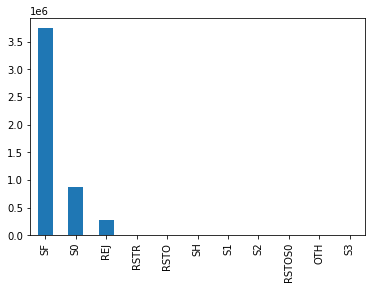

In [17]:
bar_graph('flag')

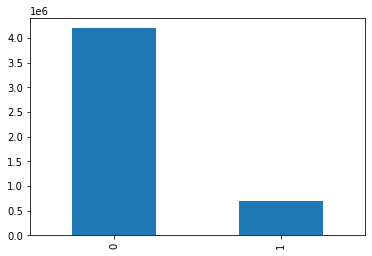

In [18]:
bar_graph('logged_in')

### logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

## TARGET FEATURE DISTRIBUTION

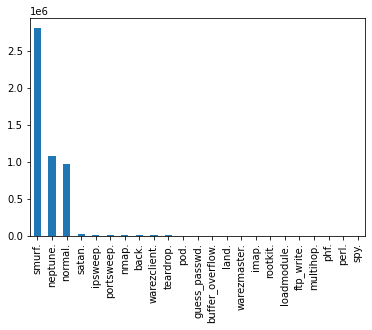

In [19]:
bar_graph('target')

### Attack Type(The attack types grouped by attack, it's what we will predict)

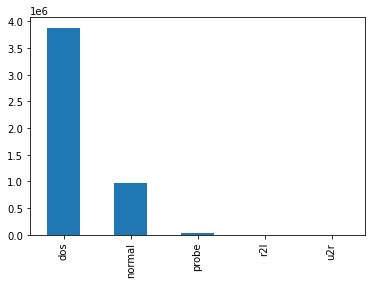

In [20]:
bar_graph('Attack Type')

In [17]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

## DATA CORRELATION

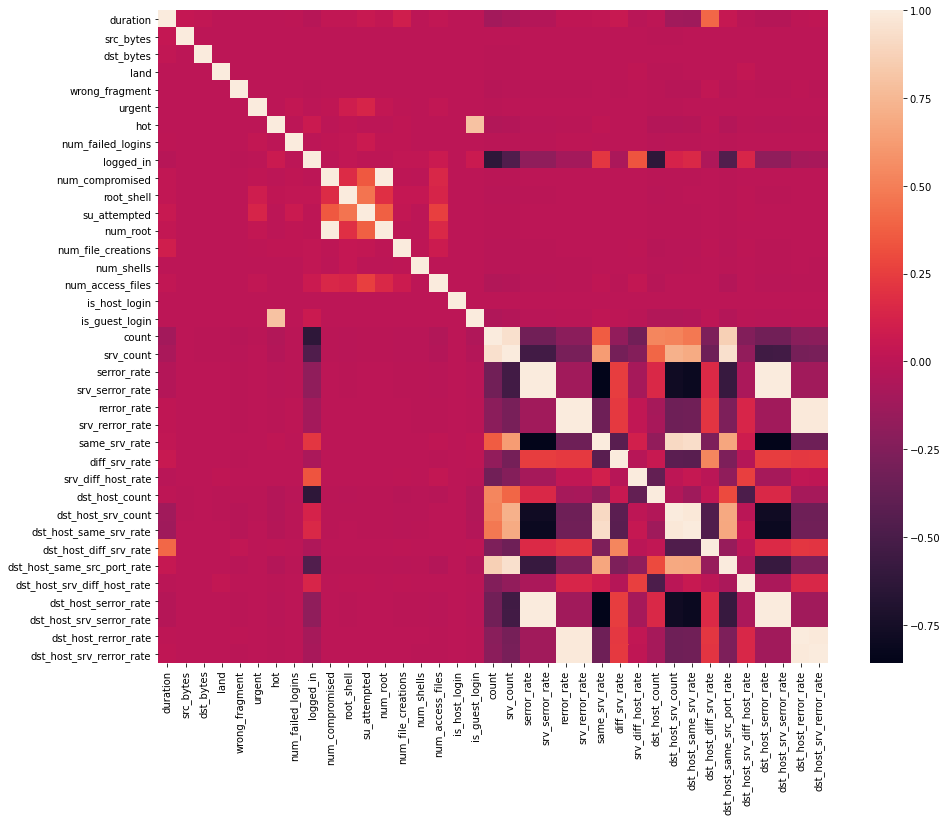

In [14]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [15]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [16]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [17]:
df.shape

(4898431, 34)

In [18]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

## FEATURE MAPPING

In [20]:
df['protocol_type'].value_counts()

icmp    2833545
tcp     1870598
udp      194288
Name: protocol_type, dtype: int64

In [21]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [22]:
df['flag'].value_counts()

SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: flag, dtype: int64

In [23]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [24]:
df['Attack Type'].value_counts()

dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: Attack Type, dtype: int64

In [25]:
#attack_type mapping
attackmap = {'dos':0, 'normal':1, 'probe':2, 'r2l':3, 'u2r':4}
df['Attack Type'] = df['Attack Type'].map(attackmap)

In [26]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,1
1,0,1,http,0,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,1
2,0,1,http,0,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,1
3,0,1,http,0,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,1
4,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,1


In [27]:
df.drop('service',axis = 1,inplace= True)
df = df.drop(['target',], axis=1)

In [28]:
df.shape

(4898431, 33)

In [29]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,215,45076,0,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,1
1,0,1,0,162,4528,0,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,1
2,0,1,0,236,1228,0,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,1
3,0,1,0,233,2032,0,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,1
4,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,1


In [30]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

## MODELLING

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

In [40]:
# Target variable and train set
Y = df['Attack Type']
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train = X
Y_train = to_categorical(Y)

(4898431, 32)


In [31]:
import pandas as pd
test_path = "input/kdd-cup-1999-data/corrected/corrected"
X_test = pd.read_csv(test_path, names=columns)

In [32]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311025,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311026,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311027,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.


# Artificial Neural Network

In [43]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [44]:

model = Sequential()

#here 30 is output dimension
model.add(Dense(31,input_dim =31,activation = 'relu',kernel_initializer='random_uniform'))

#in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))

#5 classes-normal,dos,probe,r2l,u2r
model.add(Dense(5,activation='softmax'))

#loss is categorical_crossentropy which specifies that we have multiple classes

model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 31)                992       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 10        
Total params: 1,034
Trainable params: 1,034
Non-trainable params: 0
_________________________________________________________________


In [51]:
%time model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=True)

Epoch 1/100
76538/76538 [==============================] - 57s 747us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 2/100
76538/76538 [==============================] - 56s 734us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 3/100
76538/76538 [==============================] - 55s 722us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 4/100
76538/76538 [==============================] - 56s 726us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 5/100
76538/76538 [==============================] - 55s 718us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 6/100
76538/76538 [==============================] - 55s 718us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 7/100
76538/76538 [==============================] - 56s 726us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 8/100
76538/76538 [==============================] - 55s 720us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 9/100
76538/76538 [==============================] - 54s 707us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 10/100
76538/76538 [==

In [52]:
model.save('ann.h5')